Machine Learning Task: Doing EDA and Preprocessing on Titanic Dataset
by Hernicksen Satria - 2702235235

Load data 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8') 
sns.set_palette("husl")

df = pd.read_csv('data/train.csv')

1. Exploratory Data Analysis (EDA)

A. Descriptive Analysis

In [65]:
print("Dataset Overview:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values Analysis:")
print(df.isnull().sum())
print("\nFeature Value Counts:")
for column in ['Pclass', 'Sex', 'Embarked', 'Survived']:
    print(f"\n{column} value counts:")
    print(df[column].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Basic Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.52

B. Data Visualization

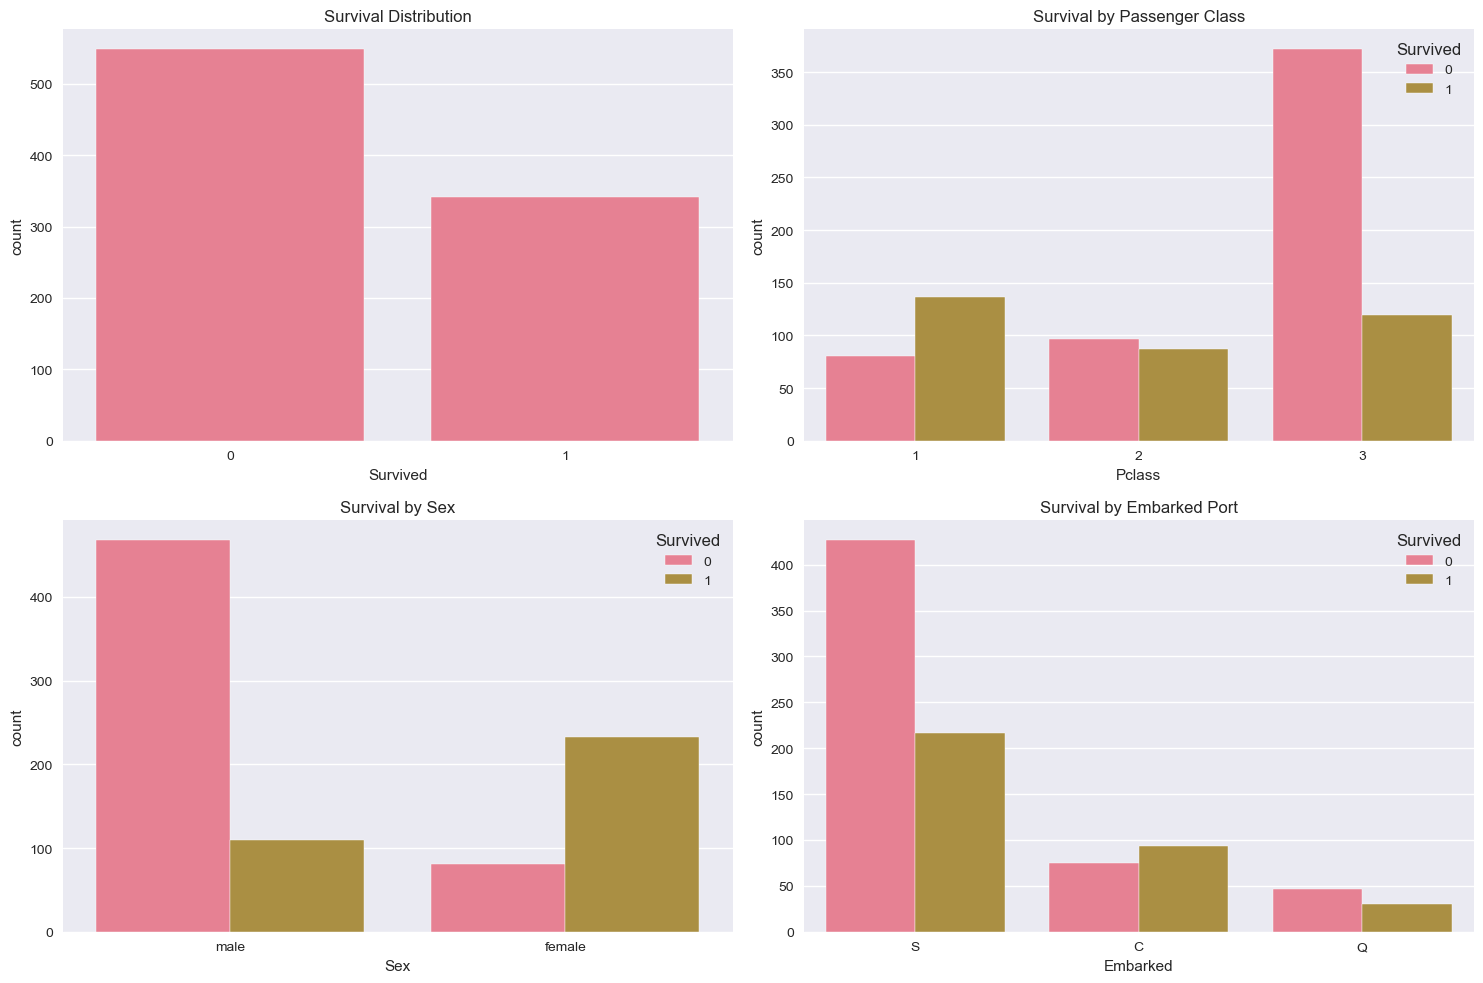

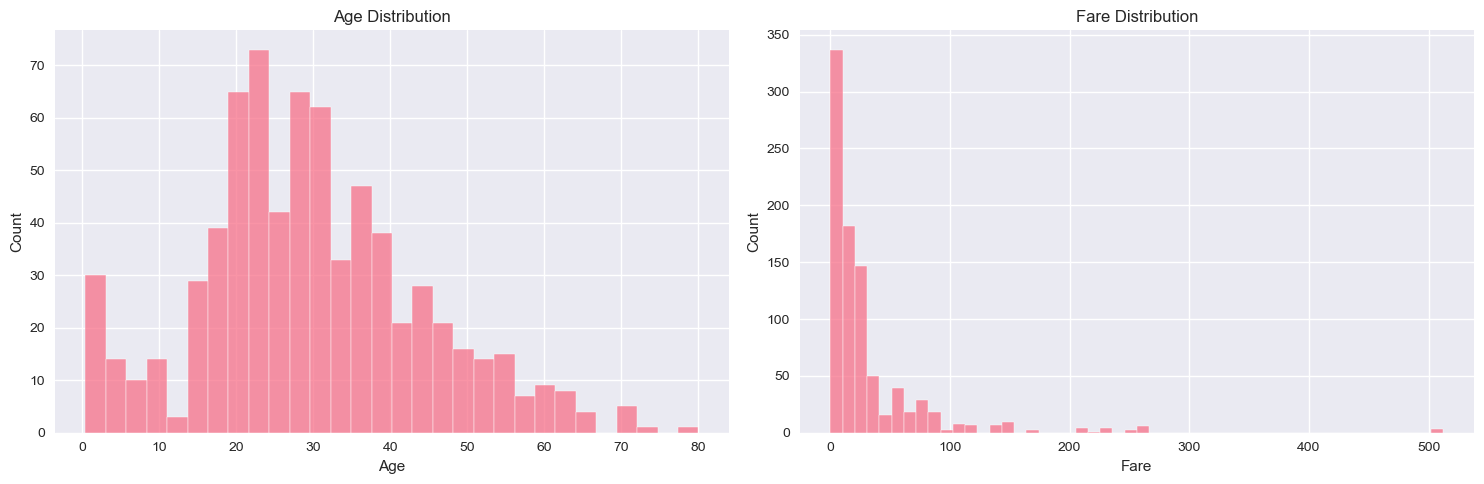

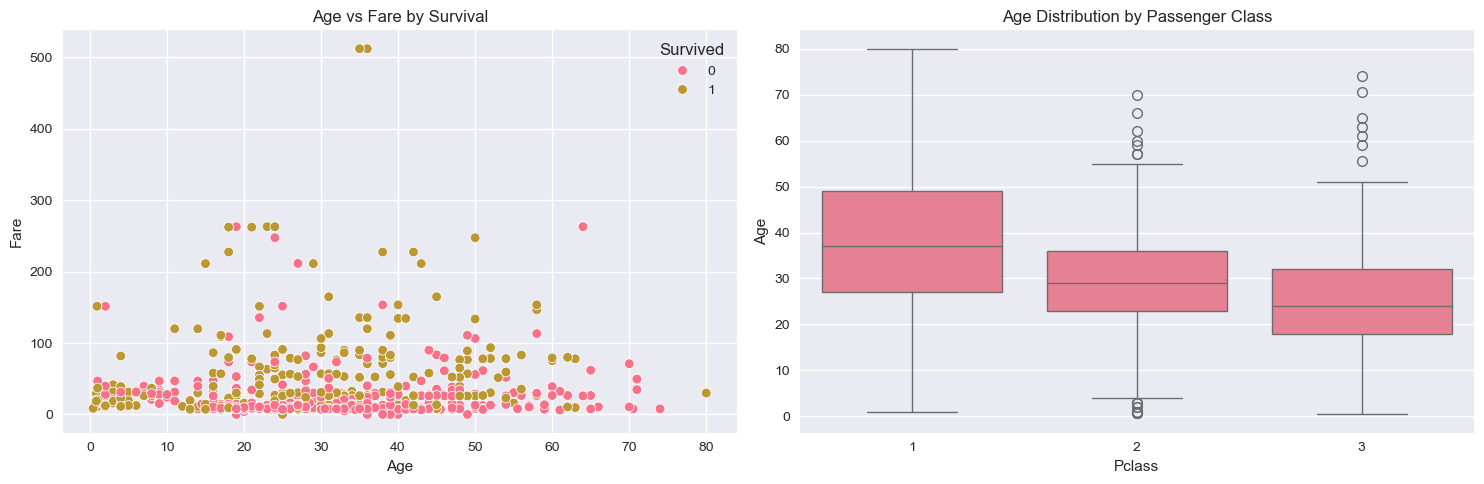

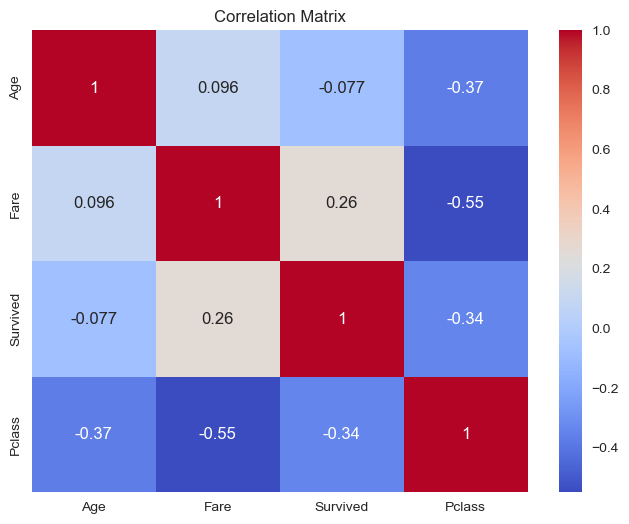

In [66]:
plt.figure(figsize=(15, 10))

# Survival Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')

# Survival by Passenger Class
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')

# Survival by Sex
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')

# Survival by Embarked Port
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarked Port')

plt.tight_layout()
plt.show()

# Create a figure for numerical features
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

# Fare Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Fare', bins=50)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

# Relationships between numerical features
plt.figure(figsize=(15, 5))

# Age vs Fare by Survival
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare by Survival')

# Box plot of Age by Passenger Class
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')

plt.tight_layout()
plt.show()

# Correlation matrix
numerical_features = df[['Age', 'Fare', 'Survived', 'Pclass']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C. Key insights from EDA

In [67]:
print("Key Insights from EDA:")
print("\n1. Survival Patterns:")
print(f"- Overall survival rate: {df['Survived'].mean():.2%}")
print(f"- Female survival rate: {df[df['Sex']=='female']['Survived'].mean():.2%}")
print(f"- Male survival rate: {df[df['Sex']=='male']['Survived'].mean():.2%}")

print("\n2. Class Distribution:")
for pclass in [1, 2, 3]:
    survival_rate = df[df['Pclass']==pclass]['Survived'].mean()
    print(f"- Class {pclass} survival rate: {survival_rate:.2%}")

print("\n3. Age Insights:")
print(f"- Median age: {df['Age'].median():.1f}")
print(f"- Missing age values: {df['Age'].isnull().sum()} ({df['Age'].isnull().mean():.2%})")

Key Insights from EDA:

1. Survival Patterns:
- Overall survival rate: 38.38%
- Female survival rate: 74.20%
- Male survival rate: 18.89%

2. Class Distribution:
- Class 1 survival rate: 62.96%
- Class 2 survival rate: 47.28%
- Class 3 survival rate: 24.24%

3. Age Insights:
- Median age: 28.0
- Missing age values: 177 (19.87%)


Complete Insights from EDA result: 

1. Gender Impact on Survival
-Female passengers had a dramatically higher survival rate than males
-Around 74% of women survived compared to only 19% of men
-This suggests gender was one of the strongest predictors of survival, likely due to "women and children first" protocol

2. Passenger Class Influence
-First-class passengers had the highest survival rate (~63%)
-Second-class passengers had a moderate survival rate (~47%)
-Third-class passengers had the lowest survival rate (~24%)
-Clear correlation between passenger class and survival chances, possibly due to cabin location and access to lifeboats

3. Age Distribution and Impact
-Most passengers were between 20-40 years old
-There were notable passenger clusters around ages 20-30
-Children (under 15) had higher survival rates
-Many missing age values (~20% of the data) required careful imputation

4. Fare Patterns
-Fare distribution was heavily right-skewed
-Most passengers paid lower fares (clustered below 50)
-Some extreme outliers paid very high fares (over 500)
-Higher fares correlated positively with survival, likely due to association with upper-class accommodations


6. Port of Embarkation
-Southampton (S) was the most common embarkation point
-Cherbourg (C) passengers had slightly higher survival rates
-Queenstown (Q) had the fewest passengers
-Small number of missing embarkation values


6. Cabin Information
-Large number of missing cabin information (687 missing values), so I'm going to drop the original cabin column
-Having a cabin record (Has_Cabin feature) correlates with higher class and survival
-Created binary feature to capture this information


7. Family Size Impact
-Passengers traveling with family members (SibSp, Parch) showed different survival patterns
-This suggests family size might have influenced survival chances

2. Data Preprocessing

A. Handling Missing Values

In [68]:
df_processed = df.copy()

df_processed['Has_Cabin'] = df_processed['Cabin'].notna().astype(int)
df_processed = df_processed.drop('Cabin', axis=1)

age_imputer = SimpleImputer(strategy='median')
df_processed['Age'] = df_processed.groupby('Pclass')['Age'].transform(
    lambda x: age_imputer.fit_transform(x.values.reshape(-1, 1)).ravel()
)

df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])

print("Missing values after handling:")
print(df_processed.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


Handling Missing Values Explanation:
- Age: Used class-specific median as age varies significantly by passenger class
- Embarked: Used mode as only 2 missing values
- Cabin: Converted to binary feature due to high missing rate (>70%)

B. Encoding Categorical Features

In [69]:
le = LabelEncoder()
df_processed['Sex'] = le.fit_transform(df_processed['Sex'])

embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked')
df_processed = pd.concat([df_processed, embarked_dummies], axis=1)

print("\nEncoded features preview:")
print(df_processed[['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())


Encoded features preview:
   Sex  Embarked_C  Embarked_Q  Embarked_S
0    1       False       False        True
1    0        True       False       False
2    0       False       False        True
3    0       False       False        True
4    1       False       False        True


Encoding Explanation:
- Sex: Label encoding because it's binary (male/female)
- Embarked: One-hot encoding because it's nominal (no ordinal relationship)

C. Feature Scaling (Normalization and Standardization)

In [70]:
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

if 'Embarked' in df_processed.columns:
    df_processed = df_processed.drop('Embarked', axis=1)

print("\nFinal processed dataset preview:")
print(df_processed.head())

print("\nFinal columns in processed dataset:")
print(df_processed.columns.tolist())


Final processed dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.533834      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.674891      1   
2                             Heikkinen, Miss. Laina    0 -0.231653      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.448255      1   
4                           Allen, Mr. William Henry    1  0.448255      0   

   Parch            Ticket      Fare  Has_Cabin  Embarked_C  Embarked_Q  \
0      0         A/5 21171 -0.502445          0       False       False   
1      0          PC 17599  0.786845          1        True       False   
2      0  STON/O2. 3101282 -0.488854          0       F

Feature Scaling Explanation:
- I chose standardization because the EDA showed Age is roughly normally distributed, there are also some outliers in Fare that which I don't want to compress, and Many ML algorithms (like SVM, linear regression, neural networks) perform better with standardized features than normalization. 

Standardization (StandardScaler) Explanation:
- Transforms features to have mean=0 and standard deviation=1
- Formula: z = (x - μ) / σ
- Used in our code because:
a. Age and Fare have different scales (Age: ~0-80, Fare: ~0-500)
b. Works well with outliers (which we saw in Fare distribution)
c. Better for normally distributed data
d. Preferred for many machine learning algorithms
